# Pairs-Trading in NIFTY500 Banking & Financial Services Sector Stocks

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
nifty500_url = "https://archives.nseindia.com/content/indices/ind_nifty500list.csv"
data = pd.read_csv(nifty500_url)
end_date = dt.datetime.now()
start_date = end_date - pd.DateOffset(365*10)
df1 = data[data['Industry'] == 'Financial Services']
tickers = df1['Symbol'].apply(lambda x: x + '.NS').tolist()
df = yf.download(tickers=tickers, start=start_date, end=end_date)['Close']
Dates = df.index
years = np.array([Dates[i].year for i in range(len(Dates))])
df['year'] = years
df.dropna(axis=1, thresh=len(df) * 0.95, inplace=True)
df.dropna(axis=0, inplace=True)
df

[*********************100%***********************]  95 of 95 completed


Ticker,AXISBANK.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BANKBARODA.NS,BANKINDIA.NS,CANBK.NS,CANFINHOME.NS,CENTRALBK.NS,CGCL.NS,...,RECLTD.NS,SAMMAANCAP.NS,SBIN.NS,SHRIRAMFIN.NS,SUNDARMFIN.NS,TATAINVEST.NS,UCOBANK.NS,UNIONBANK.NS,YESBANK.NS,year
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-08,538.025513,144.774841,1108.993530,435.700562,150.294006,182.472610,64.423653,117.454781,103.391441,34.291210,...,57.056694,358.338623,249.040024,152.793365,1162.449463,470.641876,64.659805,132.521103,154.066437,2015
2015-04-09,553.752991,145.674942,1097.223267,437.200012,152.875275,188.498901,66.137321,139.294922,107.322098,36.444958,...,58.101768,373.600128,255.359207,152.142456,1174.903320,465.213989,65.044403,135.473511,158.027939,2015
2015-04-10,549.784729,144.700226,1096.674805,438.893646,155.056046,194.037766,66.637848,135.861160,107.421608,36.051659,...,59.440544,373.021790,259.814484,149.427002,1176.781982,467.234558,65.092468,136.021805,158.196899,2015
2015-04-13,547.800659,143.064133,1087.266846,432.259918,156.257675,195.854538,67.817047,137.564102,105.083115,35.583458,...,58.930946,373.150238,260.314545,150.446136,1175.197754,466.878021,65.669365,138.257217,158.027939,2015
2015-04-15,532.508667,141.403091,1092.413452,432.478271,158.883499,201.083221,68.682381,145.752991,104.088013,35.059067,...,57.885845,368.427307,263.678741,144.555038,1164.623169,465.689331,66.582771,139.775589,158.769531,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-28,1102.000000,2007.349976,12473.049805,8945.599609,228.529999,107.120003,89.000000,669.450012,42.770000,170.210007,...,429.200012,107.099998,771.500000,656.000000,4574.450195,6317.700195,35.700001,126.180000,16.879999,2025
2025-04-01,1085.599976,1937.099976,11911.450195,8698.200195,228.580002,110.290001,90.000000,663.349976,41.310001,171.460007,...,416.899994,111.930000,771.700012,637.450012,4513.799805,6232.100098,31.200001,124.779999,17.330000,2025
2025-04-02,1084.449951,1930.949951,11515.099609,8669.250000,231.520004,111.550003,91.099998,670.900024,36.860001,169.759995,...,424.549988,111.839996,775.950012,639.400024,4481.600098,6270.950195,30.040001,127.309998,17.400000,2025


In [19]:
len(df) * 0.7

1728.3

# Train-Test Split

* Training data to find cointegrated pairs
* Testing data for backtesting*

In [20]:
df_train = df.iloc[:1728,:]
df_train

Ticker,AXISBANK.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BANKBARODA.NS,BANKINDIA.NS,CANBK.NS,CANFINHOME.NS,CENTRALBK.NS,CGCL.NS,...,RECLTD.NS,SAMMAANCAP.NS,SBIN.NS,SHRIRAMFIN.NS,SUNDARMFIN.NS,TATAINVEST.NS,UCOBANK.NS,UNIONBANK.NS,YESBANK.NS,year
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-08,538.025513,144.774841,1108.993530,435.700562,150.294006,182.472610,64.423653,117.454781,103.391441,34.291210,...,57.056694,358.338623,249.040024,152.793365,1162.449463,470.641876,64.659805,132.521103,154.066437,2015
2015-04-09,553.752991,145.674942,1097.223267,437.200012,152.875275,188.498901,66.137321,139.294922,107.322098,36.444958,...,58.101768,373.600128,255.359207,152.142456,1174.903320,465.213989,65.044403,135.473511,158.027939,2015
2015-04-10,549.784729,144.700226,1096.674805,438.893646,155.056046,194.037766,66.637848,135.861160,107.421608,36.051659,...,59.440544,373.021790,259.814484,149.427002,1176.781982,467.234558,65.092468,136.021805,158.196899,2015
2015-04-13,547.800659,143.064133,1087.266846,432.259918,156.257675,195.854538,67.817047,137.564102,105.083115,35.583458,...,58.930946,373.150238,260.314545,150.446136,1175.197754,466.878021,65.669365,138.257217,158.027939,2015
2015-04-15,532.508667,141.403091,1092.413452,432.478271,158.883499,201.083221,68.682381,145.752991,104.088013,35.059067,...,57.885845,368.427307,263.678741,144.555038,1164.623169,465.689331,66.582771,139.775589,158.769531,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30,747.194397,1710.292236,4750.245605,7159.029297,104.545700,42.721786,41.377434,598.141357,18.850000,582.693726,...,74.526848,140.076050,469.552551,191.495926,1839.508911,1289.180176,11.587209,34.689495,12.250000,2022
2022-03-31,757.848022,1703.457764,4780.776367,7167.025391,102.344742,41.765324,41.250648,617.706116,18.350000,580.946716,...,74.285355,137.977524,468.840118,193.267075,1878.874146,1275.778198,11.786131,34.555561,12.300000,2022
2022-04-01,771.189880,1711.320801,5150.755371,7313.278809,106.379845,43.997059,43.460346,641.134888,18.900000,580.710632,...,76.579430,146.109283,482.756683,201.186096,1887.202515,1333.148315,12.084514,36.698536,12.650000,2022


In [21]:
df_test = df.iloc[1728:,:]
df_test

Ticker,AXISBANK.NS,BAJAJFINSV.NS,BAJAJHLDNG.NS,BAJFINANCE.NS,BANKBARODA.NS,BANKINDIA.NS,CANBK.NS,CANFINHOME.NS,CENTRALBK.NS,CGCL.NS,...,RECLTD.NS,SAMMAANCAP.NS,SBIN.NS,SHRIRAMFIN.NS,SUNDARMFIN.NS,TATAINVEST.NS,UCOBANK.NS,UNIONBANK.NS,YESBANK.NS,year
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-06,770.343506,1669.464355,5933.741699,7252.912109,109.956406,47.458527,44.891209,640.205566,20.250000,581.938232,...,80.594032,155.989807,488.218781,198.750793,1977.843994,1397.666016,12.631549,38.975456,14.700000,2022
2022-04-07,788.663696,1652.879517,5956.065430,7196.888184,109.314445,46.319881,44.673866,653.656311,20.500000,589.020630,...,80.322365,154.153610,489.168732,199.951401,1985.348877,1381.395630,12.631549,38.305779,15.550000,2022
2022-04-08,791.451599,1672.359985,5929.448242,7272.310547,110.323235,47.777348,44.981773,643.922791,20.350000,588.123596,...,80.775131,150.743530,490.261139,205.588425,2009.800537,1406.929810,12.631549,39.332619,15.650000,2022
2022-04-11,782.640015,1655.270996,5867.768555,7242.743164,110.323235,47.504074,44.574245,648.765015,20.100000,627.596191,...,80.835510,151.224411,489.121277,208.381363,2046.793335,1404.578491,12.532089,38.796871,15.100000,2022
2022-04-12,794.986206,1629.330444,5436.921387,7181.389160,110.185669,46.456524,43.732025,641.232666,19.799999,606.773865,...,78.964043,146.109283,487.173859,201.109467,2026.166748,1384.781250,12.183975,37.725384,14.650000,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-28,1102.000000,2007.349976,12473.049805,8945.599609,228.529999,107.120003,89.000000,669.450012,42.770000,170.210007,...,429.200012,107.099998,771.500000,656.000000,4574.450195,6317.700195,35.700001,126.180000,16.879999,2025
2025-04-01,1085.599976,1937.099976,11911.450195,8698.200195,228.580002,110.290001,90.000000,663.349976,41.310001,171.460007,...,416.899994,111.930000,771.700012,637.450012,4513.799805,6232.100098,31.200001,124.779999,17.330000,2025
2025-04-02,1084.449951,1930.949951,11515.099609,8669.250000,231.520004,111.550003,91.099998,670.900024,36.860001,169.759995,...,424.549988,111.839996,775.950012,639.400024,4481.600098,6270.950195,30.040001,127.309998,17.400000,2025


# Test for Cointegration

In [22]:
columns = ['stock1', 'stock2', 'correlation']
pairs = pd.DataFrame(columns=columns)
for i in range(len(df_train.columns)):
    for j in range(i+1, len(df_train.columns)):
        stock1 = df_train[df_train.columns[i]]
        stock2 = df_train[df_train.columns[j]]
        returns1 = stock1.pct_change()[1:]
        returns2 = stock2.pct_change()[1:]
        correlation = np.corrcoef(returns1, returns2)[0,1]
        if correlation>0.6:
            model = sm.OLS(stock1, stock2).fit()
            residuals = model.resid
            p_value = sm.tsa.adfuller(residuals)[1]
            if p_value<0.02:
                new_row = pd.DataFrame({'stock1':[df_train.columns[i]], 'stock2':[df_train.columns[j]], 'correlation':[correlation]})
                pairs = pd.concat([pairs, new_row])
pairs

/tmp/ipykernel_111416/967070817.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pairs = pd.concat([pairs, new_row])


,stock1,stock2,correlation
0,BANKINDIA.NS,INDIANB.NS,0.605726
0,BANKINDIA.NS,PNB.NS,0.735501
0,HDFCBANK.NS,KOTAKBANK.NS,0.634716
0,IOB.NS,MAHABANK.NS,0.605638


## Calculating the Spread

Now we can plot the spread of the two time series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities,

/tmp/ipykernel_111416/3660122774.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[0]


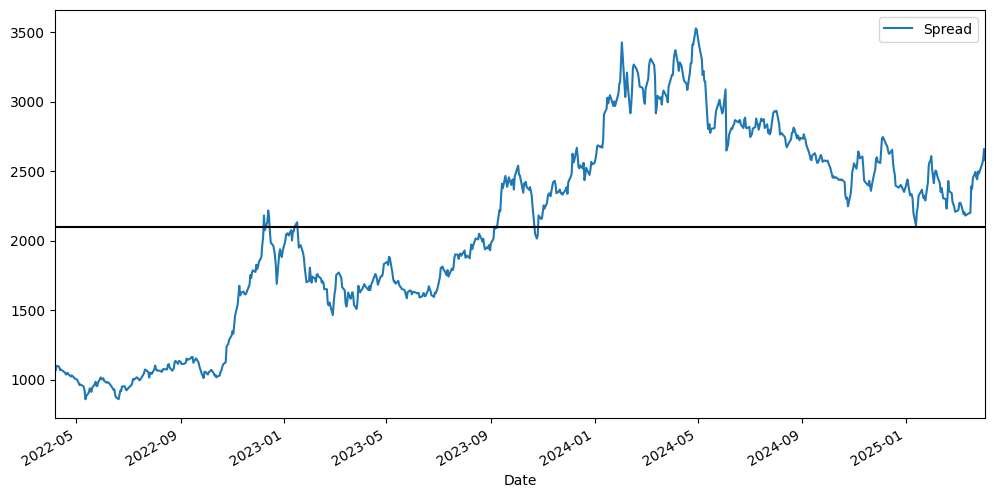

In [23]:
S1 = df_test['BANKINDIA.NS']
S2 = df_test['PNB.NS']
S1 = sm.add_constant(S1)
model = sm.OLS(S2,S1).fit()
S1 = df_test['BANKINDIA.NS']
beta = model.params[0]
spread = S2 - beta*S1


spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2022-04-06', '2025-04-04')
plt.legend(['Spread'])

# Ratio

* Alternatively, we can examine the ratio between the two time series

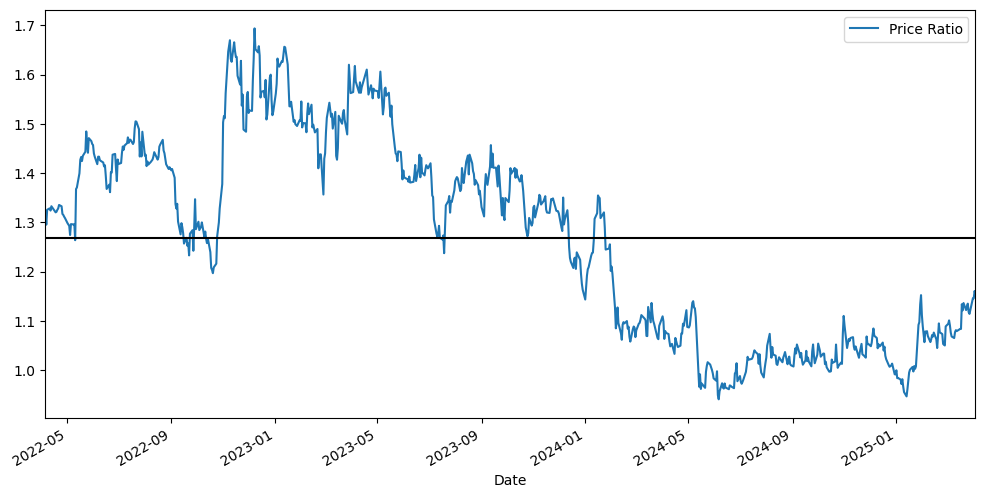

In [24]:
S1 = df_test['BANKINDIA.NS']
S2 = df_test['PNB.NS']
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.xlim('2022-04-06', '2025-04-04')
plt.legend(['Price Ratio'])

# Rolling Ratio z score based Approach

Regardless of whether or not we use the spread approach or the ratio approach, we can see that our first plot pair BANKINDIA/PNB tends to move around the mean. We now need to standardize this ratio because the absolute ratio might not be the most ideal way of analyzing this trend. For this, we need to use z-scores.

A z-score is the number of standard deviations a datapoint is from the mean. More importantly, the nmber of standard deviations above or below the population mean is from the raw score. The z-score is calculated by the follow:

$$\mathcal{z}_{i}=\frac{x_{i}-\bar{x}}{s} $$

### Feature Engineering

We need to find out what features are actually important in determining the direction of the ratio moves. Knowing that the ratios always eventually revert back to the mean, maybe the moving averages and metrics related to the mean will be important.

Let's try using these features:

* 60 day Moving Average of Ratio
* 5 day Moving Average of Ratio
* 60 day Standard Deviation
* z score

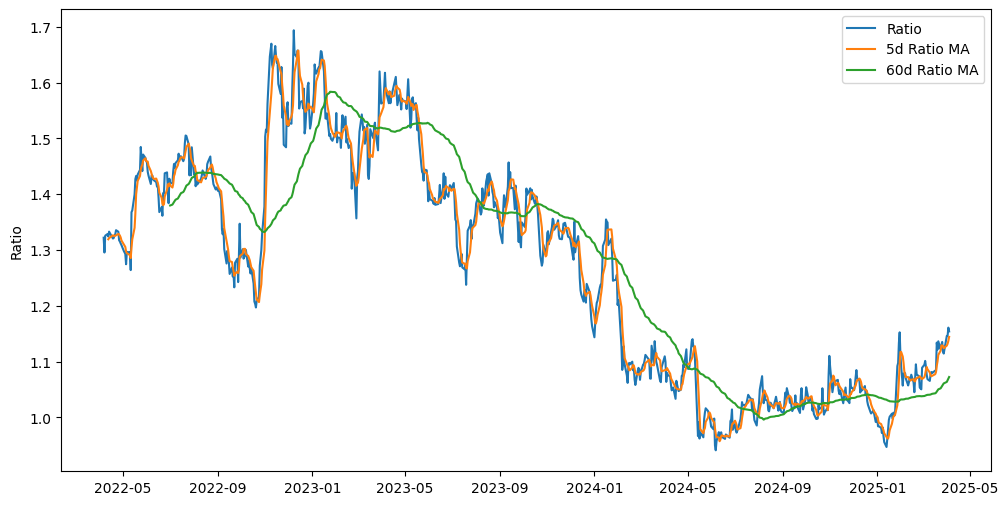

In [25]:
ratio_mavg5 = ratio.rolling(window=5, center=False).mean()
ratio_mavg60 = ratio.rolling(window=60, center=False).mean()
std_60 = ratio.rolling(window=60, center=False).std()
zscore_5_60 = (ratio_mavg5 - ratio_mavg60) / std_60

plt.figure(figsize=(12, 6))
plt.plot(ratio.index, ratio.values)
plt.plot(ratio_mavg5.index, ratio_mavg5.values)
plt.plot(ratio_mavg60.index, ratio_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

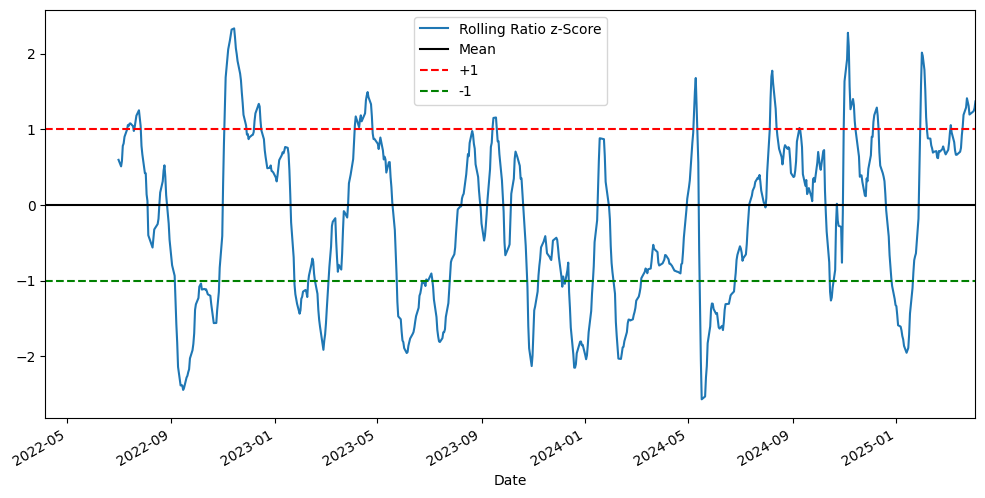

In [26]:
plt.figure(figsize=(12,6))
zscore_5_60.plot()
plt.xlim('2022-04-06', '2025-04-04')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

#### Creating a Model

A standard normal distribution has a mean of 0 and a standard deviation 1. Looking at the plot, it's pretty clear that if the time series moves 1 standard deviation beyond the mean, it tends to revert back towards the mean. Using these models, we can create the following trading signals:

* Buy(1) whenever the z-score is below -1, meaning we expect the ratio to increase.
* Sell(-1) whenever the z-score is above 1, meaning we expect the ratio to decrease.

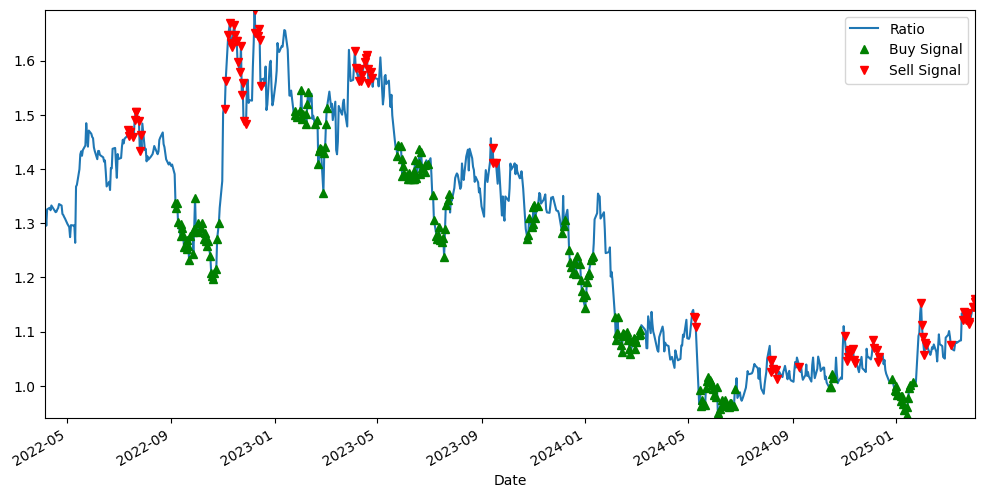

In [27]:
plt.figure(figsize=(12,6))

ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_5_60>-1] = 0
sell[zscore_5_60<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.xlim('2022-04-06', '2025-04-04')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

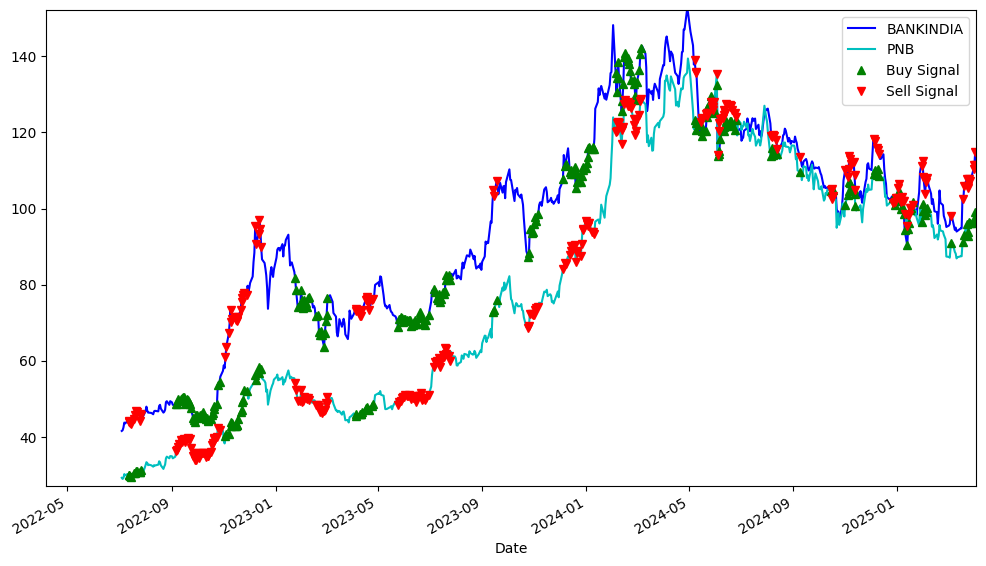

In [28]:
plt.figure(figsize=(12,7))
S1 = df_test['BANKINDIA.NS']
S2 = df_test['PNB.NS']

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
# plt.ylim(25, 105)
plt.xlim('2022-04-06', '2025-04-04')

plt.legend(['BANKINDIA', 'PNB', 'Buy Signal', 'Sell Signal'])
plt.show()

# Trade Function

In [29]:
def trade(stock1, stock2):

    price1 = df_test[stock1]
    price2 = df_test[stock2]
    returns1 = price1.pct_change()[1:]
    returns2 = price2.pct_change()[1:]
    ratio = price1/price2
    ratio_mavg5 = ratio.rolling(window=5, center=False).mean()
    ratio_mavg60 = ratio.rolling(window=60, center=False).mean()
    std_60 = ratio.rolling(window=60, center=False).std()
    zscore_5_60 = (ratio_mavg5 - ratio_mavg60) / std_60

    # if indicator = 1, then stock1 is overpriced relative to stock2 hence short stock1 and buy stock2
    # if indicator = 0, do nothing
    # if indicator = -1, then stock1 is underpriced relative to stock2 hence buy stock1 and short stock2
    # Stop Loss of 3 standard deviation
    
    indicator = ((zscore_5_60>1).astype(float) - (zscore_5_60>3).astype(float)) - ((zscore_5_60<-1).astype(float) - (zscore_5_60<-3).astype(float))
    indicator = indicator.shift()
    daily_returns  = indicator * (returns2 - returns1)
    returns = np.exp(np.sum(np.log1p(daily_returns))) - 1
    return returns*100, daily_returns*100

In [30]:
returns, daily_returns = trade('BANKINDIA.NS', 'PNB.NS')
returns

np.float64(73.67339359777225)

In [31]:
returns = pd.DataFrame(daily_returns, columns=['returns'])
returns

,returns
Date,
2022-04-06,NaN
2022-04-07,0.000000
2022-04-08,-0.000000
2022-04-11,-0.000000
2022-04-12,0.000000
...,...
2025-03-28,0.340365
2025-04-01,-2.844867
2025-04-02,0.000530


# Analytics

/tmp/ipykernel_111416/2165333840.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').sum()
/tmp/ipykernel_111416/2165333840.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = returns.resample('M').sum()


Strategy Performance Summary:

Mean Daily Return (%)              : 0.08
Std Dev Daily Return (%)           : 1.24
Annualized Sharpe Ratio            : 1.06
Total Return (%)                   : 73.67
Annualized Return (CAGR %)         : 20.26
Max Drawdown (%)                   : -11.63
Win Rate (%)                       : 22.03
Number of Trades                   : 293.00


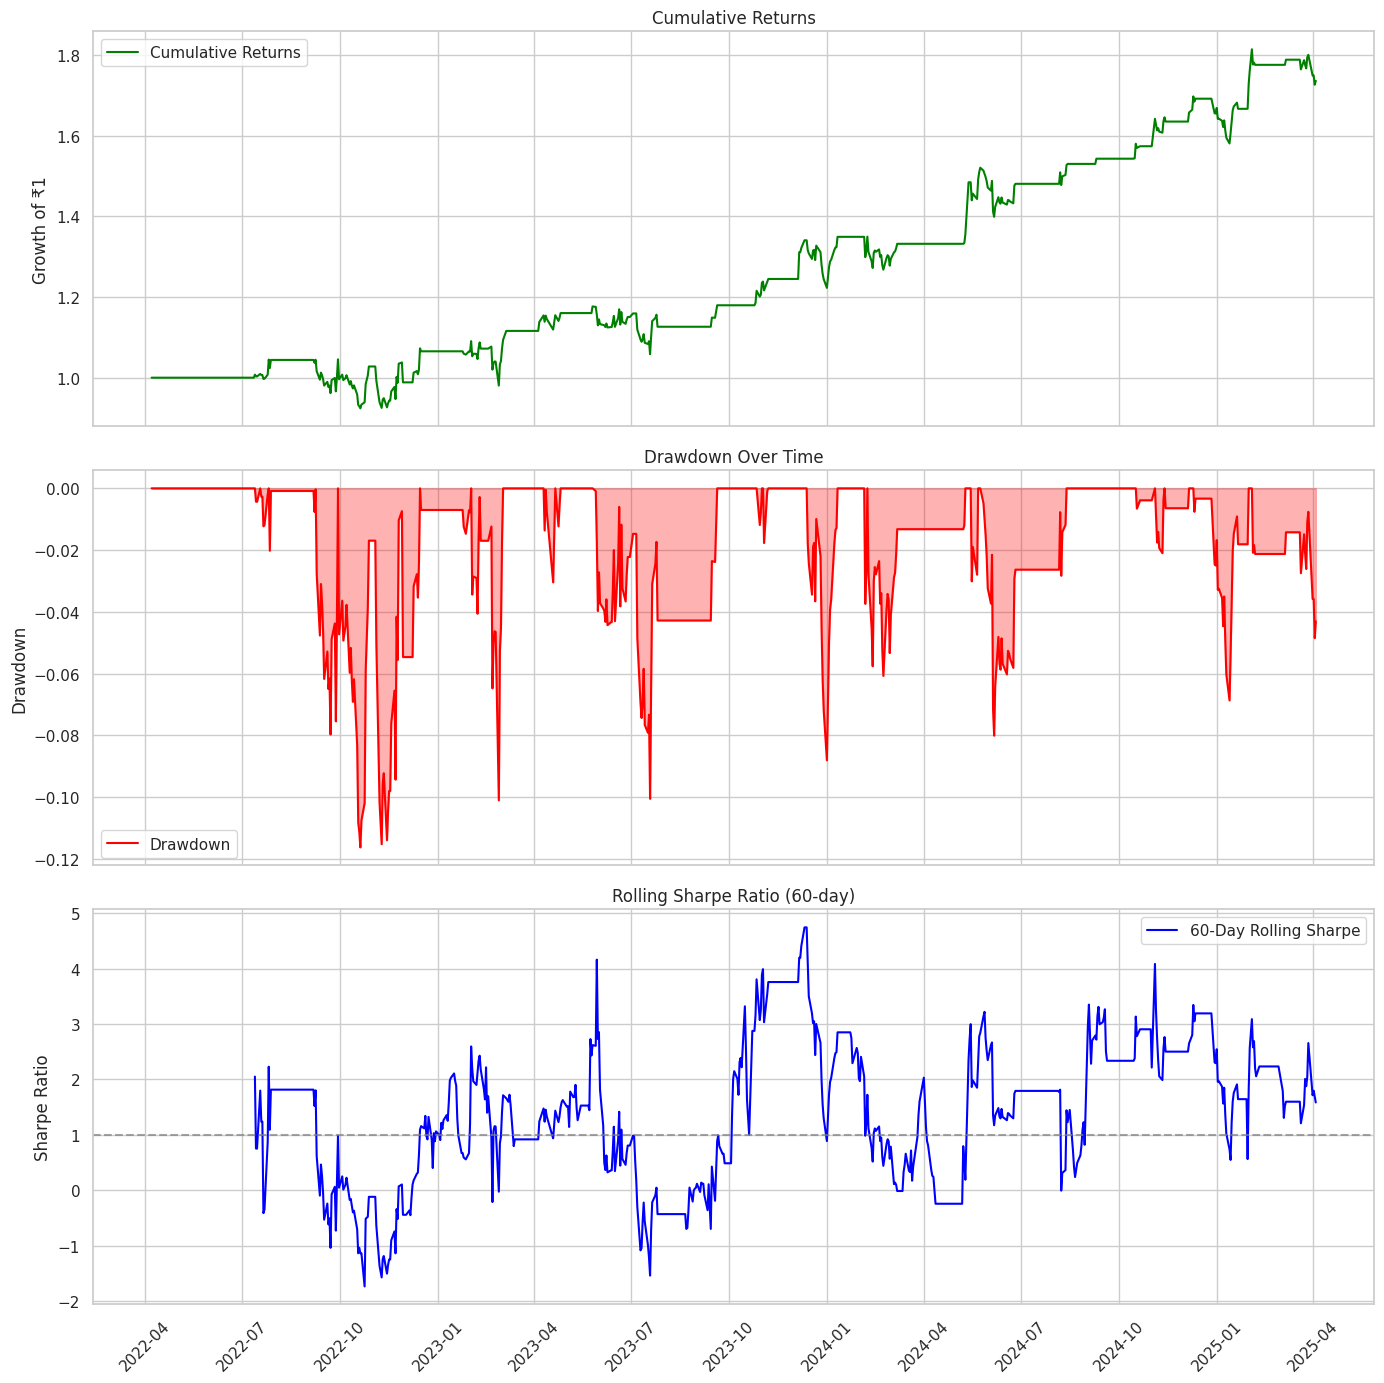

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming your dataframe is already loaded as `returns_df`
returns = returns['returns'].dropna()

# Cumulative return
cumulative_returns = (1 + returns / 100).cumprod()

# Rolling Sharpe Ratio
rolling_sharpe = returns.rolling(window=60).mean() / returns.rolling(window=60).std() * np.sqrt(252)

# Drawdown
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max

# Monthly returns
monthly_returns = returns.resample('M').sum()

# Summary statistics
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
overall_cumulative_return = (1 + returns / 100).prod() - 1
num_days = (returns.index[-1] - returns.index[0]).days
years = num_days / 365.25
annual_return = (1 + overall_cumulative_return) ** (1 / years) - 1
max_drawdown = drawdown.min()
win_rate = (returns > 0).mean()
num_trades = (returns != 0).sum()

summary = {
    "Mean Daily Return (%)": returns.mean(),
    "Std Dev Daily Return (%)": returns.std(),
    "Annualized Sharpe Ratio": sharpe_ratio,
    "Total Return (%)": (cumulative_returns.iloc[-1] - 1) * 100,
    "Annualized Return (CAGR %)": annual_return * 100,
    "Max Drawdown (%)": max_drawdown * 100,
    "Win Rate (%)": win_rate * 100,
    "Number of Trades": num_trades
}

# Print summary
print("Strategy Performance Summary:\n")
for key, value in summary.items():
    print(f"{key:35s}: {value:.2f}")

# Plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(14, 14), sharex=True)

monthly_returns = returns.resample('M').sum()
# Cumulative Returns
axs[0].plot(cumulative_returns.index, cumulative_returns, label="Cumulative Returns", color="green")
axs[0].set_title("Cumulative Returns")
axs[0].set_ylabel("Growth of ₹1")
axs[0].legend()

# Drawdown
axs[1].plot(drawdown.index, drawdown, label="Drawdown", color="red")
axs[1].fill_between(drawdown.index, drawdown, color="red", alpha=0.3)
axs[1].set_title("Drawdown Over Time")
axs[1].set_ylabel("Drawdown")
axs[1].legend()

# Rolling Sharpe Ratio
axs[2].plot(rolling_sharpe.index, rolling_sharpe, label="60-Day Rolling Sharpe", color="blue")
axs[2].axhline(1, linestyle="--", color="gray", alpha=0.7)
axs[2].set_title("Rolling Sharpe Ratio (60-day)")
axs[2].set_ylabel("Sharpe Ratio")
axs[2].legend()

for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Improvements
- Consider weighting each pair based on how strongly they cointegrate to form a weighted portfolio and include leverage.
- Johansen Cointegration test for multi-assets trading rather than just pairs.
- Since performance drops off around 2 years after the calibration, recalibrating the pairs every year can lead to better performance as signals fade over time.
- Account for trading costs since lots of trades are made here. 